In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92613634a4f87671f71fbff01a9d76c6


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | darnah
Processing Record 2 of Set 1 | nanakuli
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | barreirinha
Processing Record 5 of Set 1 | dreznica
Processing Record 6 of Set 1 | banepa
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | laguna
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | alekseyevsk
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | khatanga
Pr

Processing Record 38 of Set 4 | alotau
City not found. Skipping...
Processing Record 39 of Set 4 | asau
Processing Record 40 of Set 4 | sawtell
Processing Record 41 of Set 4 | ganzhou
Processing Record 42 of Set 4 | adrar
Processing Record 43 of Set 4 | claudio
Processing Record 44 of Set 4 | marsh harbour
Processing Record 45 of Set 4 | bonthe
Processing Record 46 of Set 4 | grindavik
Processing Record 47 of Set 4 | jiddah
City not found. Skipping...
Processing Record 48 of Set 4 | urucurituba
Processing Record 49 of Set 4 | saldanha
Processing Record 50 of Set 4 | carbonia
Processing Record 1 of Set 5 | iracoubo
Processing Record 2 of Set 5 | lasa
Processing Record 3 of Set 5 | chippewa falls
Processing Record 4 of Set 5 | azare
Processing Record 5 of Set 5 | husavik
Processing Record 6 of Set 5 | zhigansk
Processing Record 7 of Set 5 | hermanus
Processing Record 8 of Set 5 | otradnyy
Processing Record 9 of Set 5 | dudinka
Processing Record 10 of Set 5 | jalu
Processing Record 11 of 

Processing Record 27 of Set 8 | kokomo
Processing Record 28 of Set 8 | aykino
Processing Record 29 of Set 8 | kahului
Processing Record 30 of Set 8 | broome
Processing Record 31 of Set 8 | sioux lookout
Processing Record 32 of Set 8 | la palma
Processing Record 33 of Set 8 | jaciara
Processing Record 34 of Set 8 | saint anthony
Processing Record 35 of Set 8 | fortuna
Processing Record 36 of Set 8 | karakendzha
City not found. Skipping...
Processing Record 37 of Set 8 | kununurra
Processing Record 38 of Set 8 | wahran
City not found. Skipping...
Processing Record 39 of Set 8 | oystese
Processing Record 40 of Set 8 | ozernovskiy
Processing Record 41 of Set 8 | villa union
Processing Record 42 of Set 8 | tikrit
Processing Record 43 of Set 8 | putina
Processing Record 44 of Set 8 | victoria point
Processing Record 45 of Set 8 | brookhaven
Processing Record 46 of Set 8 | ishigaki
Processing Record 47 of Set 8 | sosua
Processing Record 48 of Set 8 | vyazemskiy
Processing Record 49 of Set 8 |

Processing Record 16 of Set 12 | novyye gorki
Processing Record 17 of Set 12 | kulhudhuffushi
Processing Record 18 of Set 12 | yerbogachen
Processing Record 19 of Set 12 | santarem
Processing Record 20 of Set 12 | nuuk
Processing Record 21 of Set 12 | sao filipe
Processing Record 22 of Set 12 | sept-iles
Processing Record 23 of Set 12 | asayita
City not found. Skipping...
Processing Record 24 of Set 12 | jiutai
Processing Record 25 of Set 12 | el alto
Processing Record 26 of Set 12 | anjangaon
Processing Record 27 of Set 12 | hervey bay
Processing Record 28 of Set 12 | pampas
Processing Record 29 of Set 12 | bolshiye uki
City not found. Skipping...
Processing Record 30 of Set 12 | poum
Processing Record 31 of Set 12 | necochea
Processing Record 32 of Set 12 | saint-augustin
Processing Record 33 of Set 12 | calatrava
Processing Record 34 of Set 12 | honolulu
Processing Record 35 of Set 12 | san andres
Processing Record 36 of Set 12 | vanimo
Processing Record 37 of Set 12 | leh
Processin

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Darnah,32.7670,22.6367,65.34,68,75,11.81,LY,2021-11-21 16:41:25
1,Nanakuli,21.3906,-158.1547,75.70,78,1,4.61,US,2021-11-21 16:41:25
2,Bredasdorp,-34.5322,20.0403,64.27,82,88,16.96,ZA,2021-11-21 16:41:26
3,Barreirinha,-2.7933,-57.0700,88.41,59,100,4.32,BR,2021-11-21 16:41:26
4,Dreznica,43.5289,17.2819,45.82,91,44,4.32,BA,2021-11-21 16:41:26
5,Banepa,27.6298,85.5214,55.72,88,20,3.44,NP,2021-11-21 16:41:27
6,Ahipara,-35.1667,173.1667,61.57,96,100,3.20,NZ,2021-11-21 16:41:27
7,Tuktoyaktuk,69.4541,-133.0374,-14.80,76,1,2.30,CA,2021-11-21 16:41:28
8,Port Elizabeth,-33.9180,25.5701,71.10,83,75,20.71,ZA,2021-11-21 16:41:28
9,Laguna,38.4210,-121.4238,59.41,93,1,1.01,US,2021-11-21 16:41:28


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

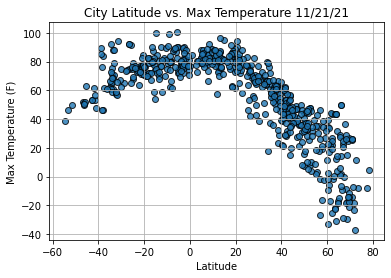

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

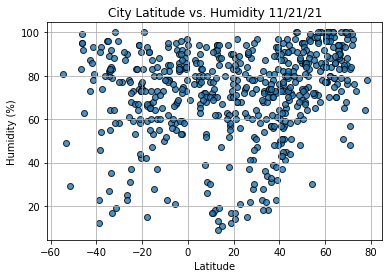

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

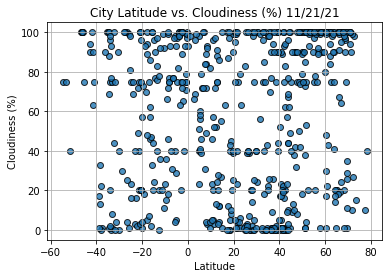

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

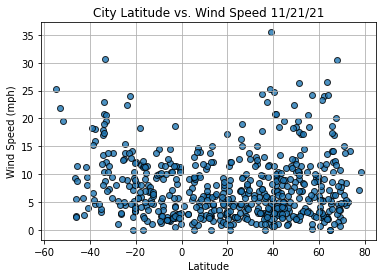

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
